In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot') #means in the graph in plotlib it creates a sort of grids in the background of graph
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8 #to show the bar chart bigger in background matplotlib 

import cufflinks as cf#pandas with plotly binding
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium #for maps


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df=pd.read_excel("F:\COVID-19-Data-Analyisis-master\Covid cases in India.xlsx")

In [4]:
df.drop(['S. No.'],axis=1,inplace=True)#inplace is used to frop it permanently and axis is to show it is from column 

In [5]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [6]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [7]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [8]:
Total_Cases_overall=df['Total Cases'].sum()
print('the total number of cases till now in India is',Total_Cases_overall)

the total number of cases till now in India is 729


In [9]:
df['Active cases']=df['Total Cases']-(df['Death']+df['Cured'])

In [10]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [11]:
df.style.background_gradient(cmap='Reds') #red is not there reds 

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [12]:
Total_Active_cases=df.groupby('Name of State / UT')['Total Cases']

In [13]:
Total_Active_cases

In [14]:
Total_Active_cases=df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()#inframe is used to highlight

In [15]:
Total_Active_cases

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [16]:
Total_Active_cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [17]:
##############Graphical representation

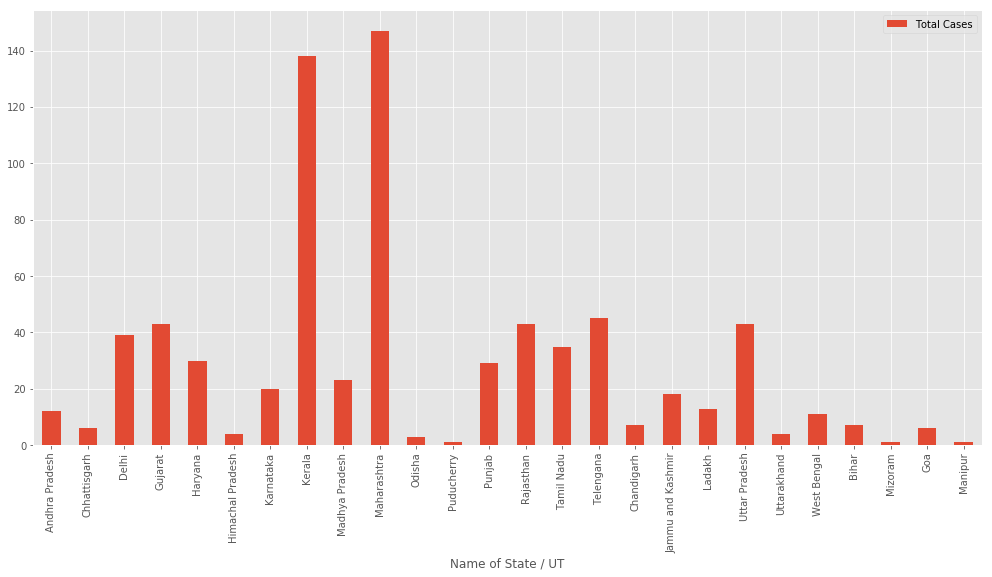

In [79]:
#pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()

#plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')




In [80]:
px.bar(df,x='Name of State / UT',y='Total Cases') #using express bar

In [28]:
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='MY GRAPH',colors='red',size=20)

px.scatter(df,x='Name of State / UT',y='Total Cases')

In [29]:
#oo vis

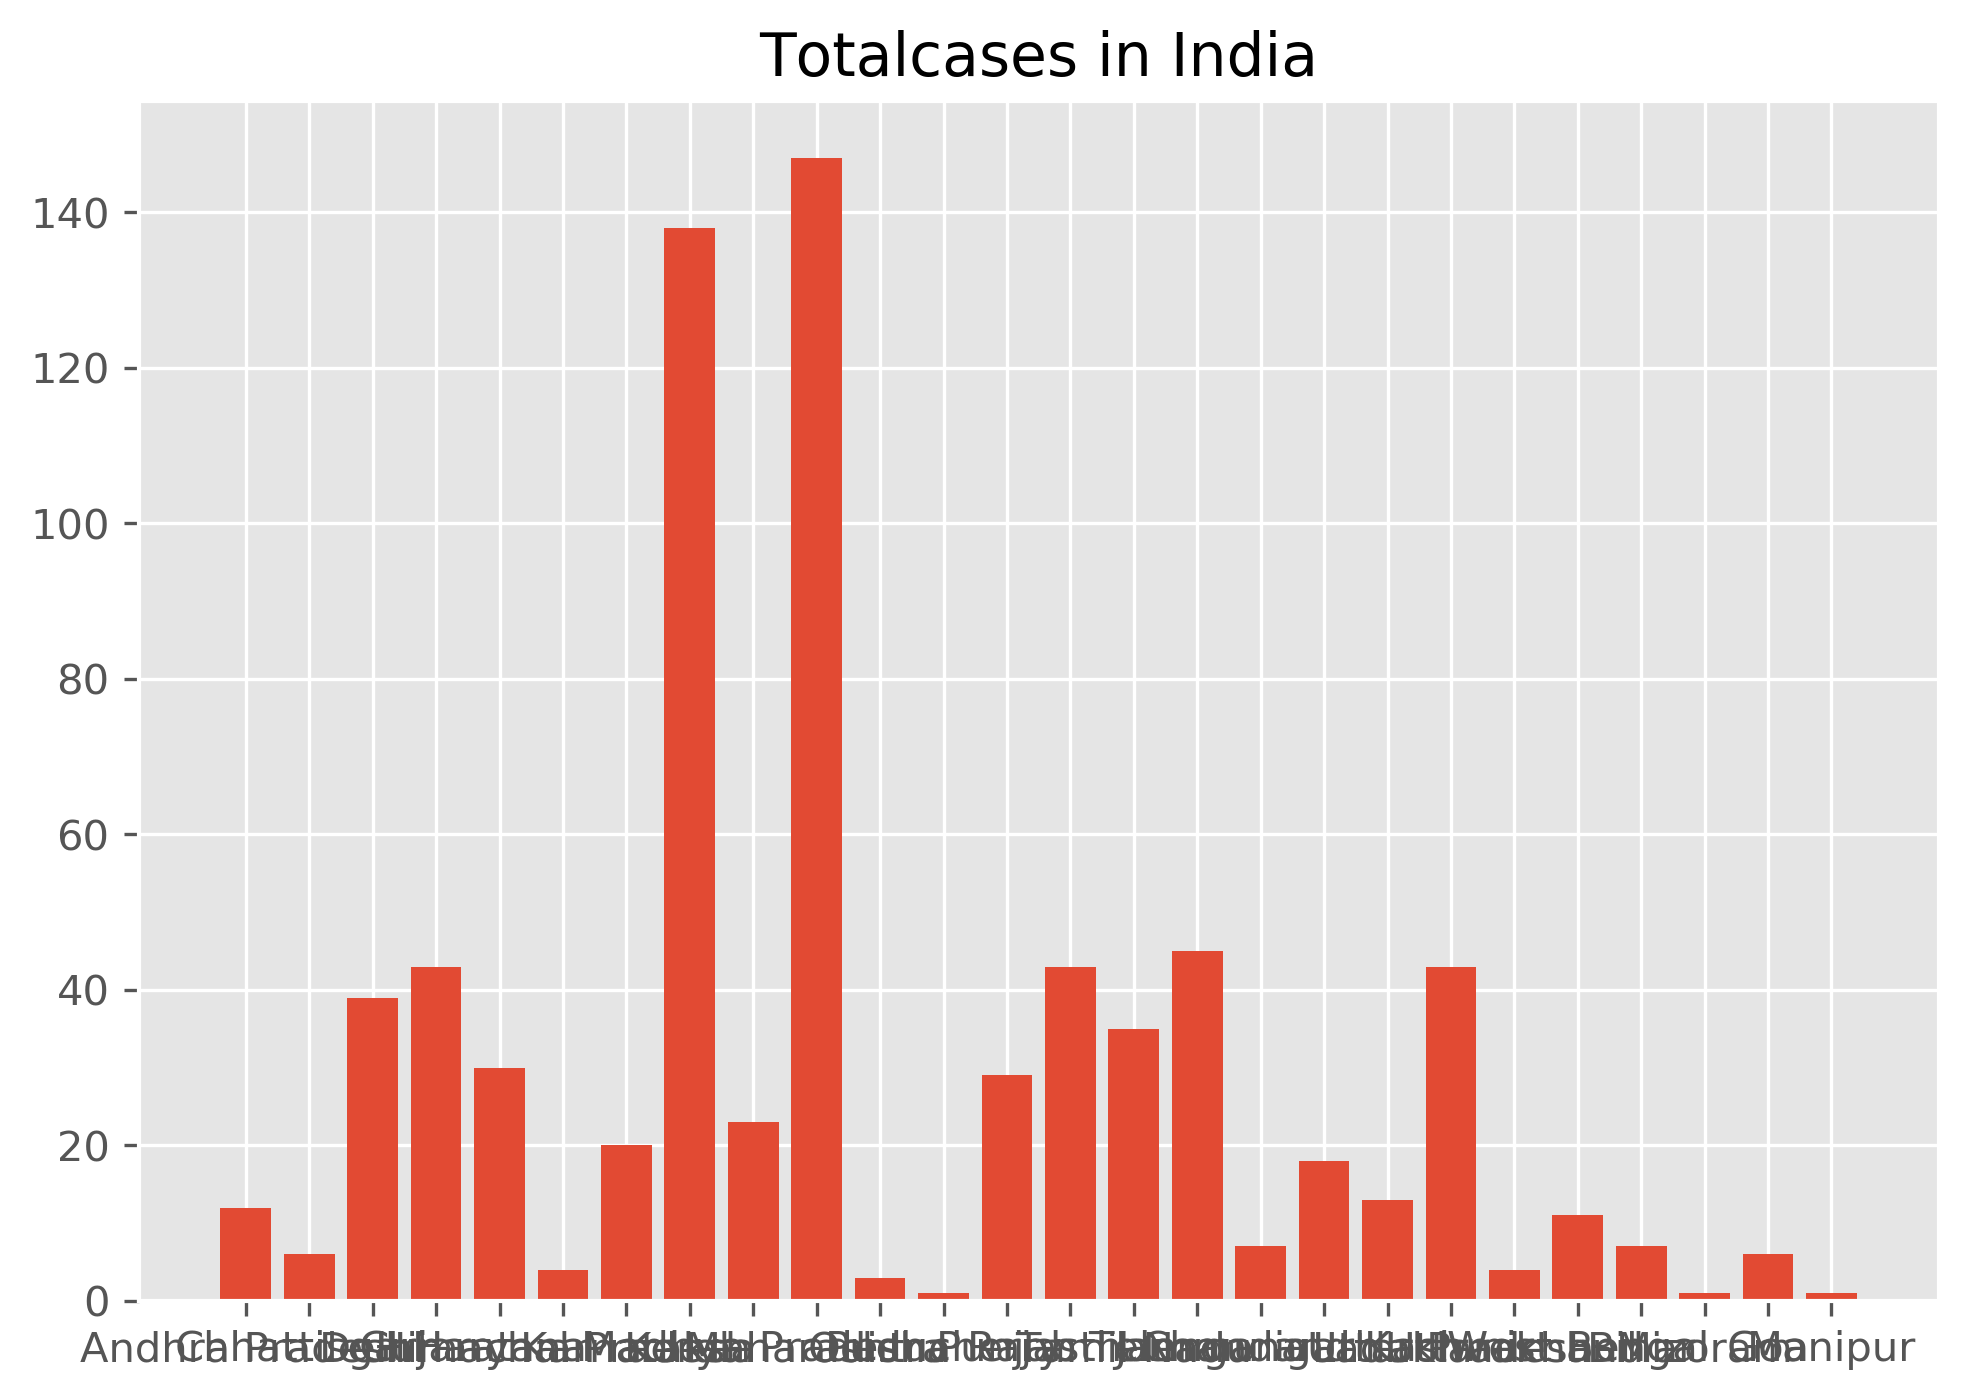

In [46]:
#matplotlib 
fig=plt.figure(dpi=300)#object is created,dpi is  pixcels
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Totalcases in India")

plt.show()# results are shown in the same window 


#plotly
fig=go.Figure()# here it is case sensitive f 
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='total cases')





In [47]:
Indian_cord=pd.read_excel(r"F:\COVID-19-Data-Analyisis-master\Indian Coordinates.xlsx")

In [48]:
Indian_cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [54]:
df_full=pd.merge(Indian_cord,df,on='Name of State / UT')# on means based on name of state whole columnall data s based so it is imp so it is on

In [55]:
df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [62]:
#use folium lib
map=folium.Map(location=[20,70],zoom_started=4,tiles='Stamenterrain')#tiles means type of styles of map map 2nd time case sensitive

for lat,long,value,name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>state</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+str(value)+ '<br>'),color='red',full_color='red').add_to(map)
    
    #circle marker is case sensitive 


In [63]:
map

In [64]:
# corona virus global analysis

In [67]:
India=pd.read_excel(r"F:\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
Italy=pd.read_excel(r"F:\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
Korea=pd.read_excel(r"F:\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
Wuhan=pd.read_excel(r"F:\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

In [68]:
India

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


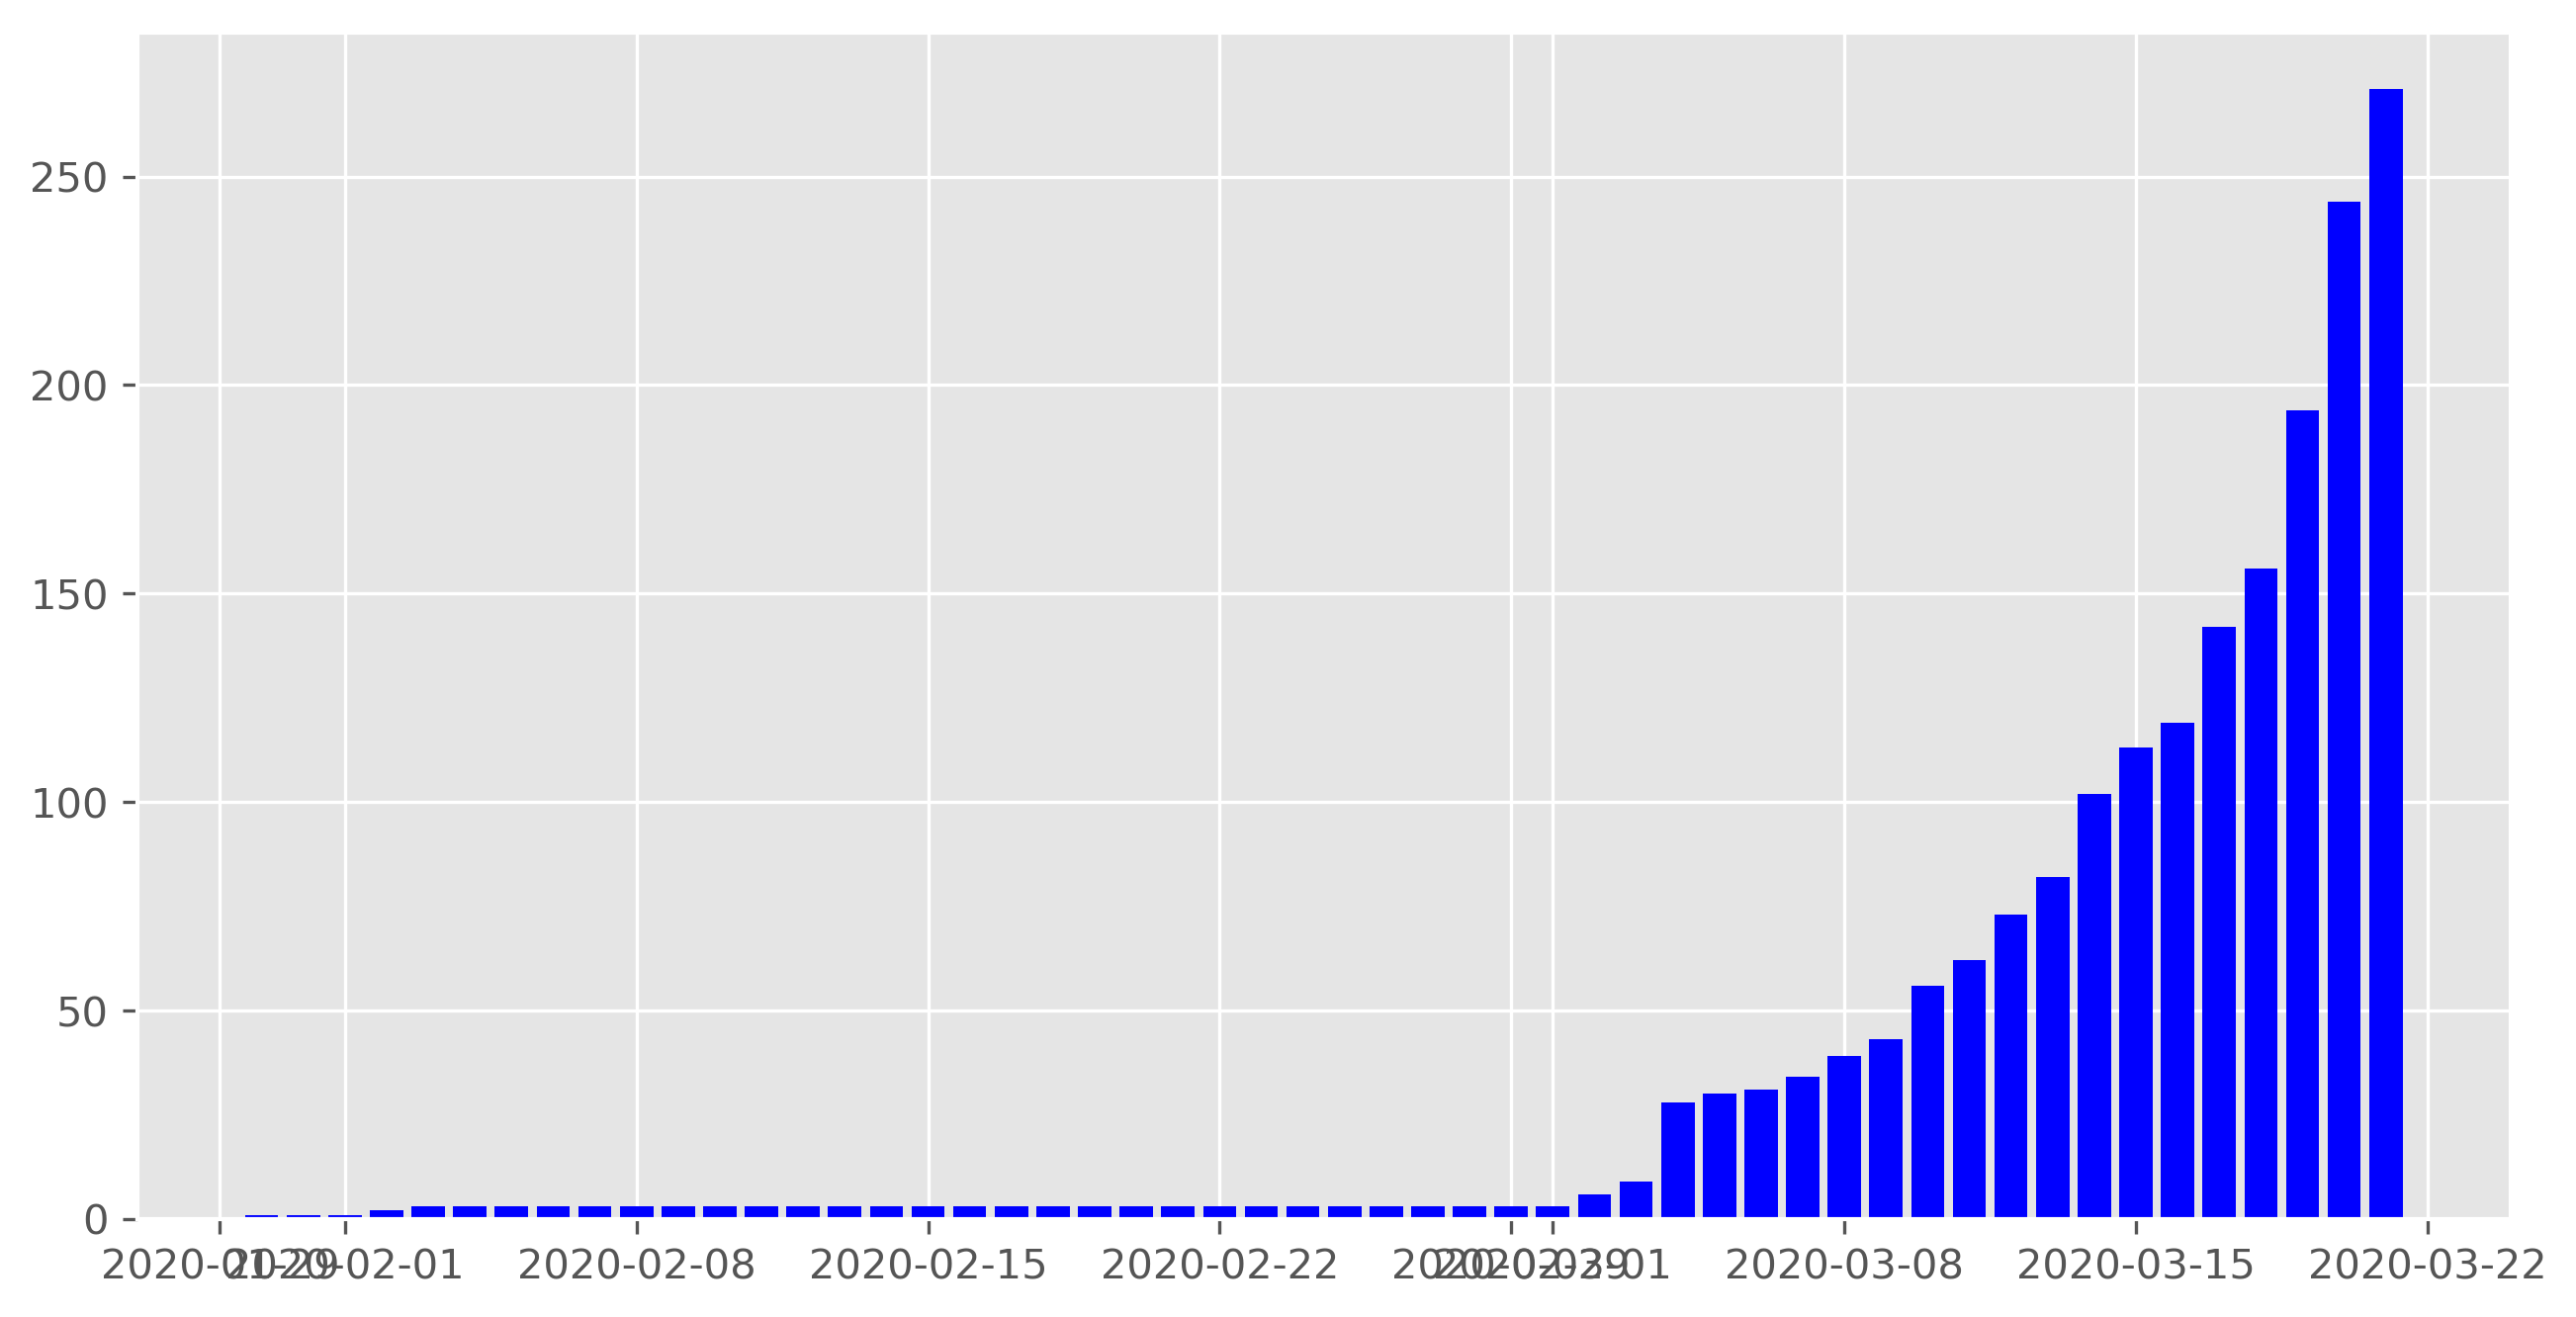

In [78]:
fig=plt.figure(figsize=(10,5),dpi=300)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(India["Date"],India["Total Cases"],color='blue')



#plotly express

fig=px.bar(India,x="Date",y="Total Cases",color='Total Cases')
fig.show()# like plt.show


In [79]:
fig=px.bar(Italy,x="Date",y="Total Cases",color='Total Cases')
fig.show()

fig=px.bar(Korea,x="Date",y="Total Cases",color='Total Cases')
fig.show()

fig=px.bar(Wuhan,x="Date",y="Total Cases",color='Total Cases')
fig.show()